In [86]:

# Imports
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
# Settings
ticker      = "ETHUSDT"
interval    ="1s"
limit       = 100000000
startTime   = 1678147200000
dir         = "ETH"
filename    = f"ETH/{ticker}_{interval}_{limit}.csv"
url         = f"https://api.binance.com/api/v3/klines?symbol={ticker}&interval={interval}&limit={limit}&startTime={startTime}"

In [88]:
# REQUEST
response = requests.get(url)
data = response.json()

In [89]:
# CONVERT DATA
df = pd.DataFrame(data,columns=["timestamp", "open", "high", 'low','close','volume', '_', '_', '_', '_', '_', '_'])
df = df[['timestamp', 'open', 'high', 'low', 'close', 'volume']]
end_date = df.iloc[0]["timestamp"]
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df[['open', 'high', 'low', 'close', 'volume']] = df[['open', 'high', 'low', 'close', 'volume']].astype(float)

In [90]:
# SAVING
if not os.path.exists(dir):
    os.makedirs(dir)
df.to_csv(filename)

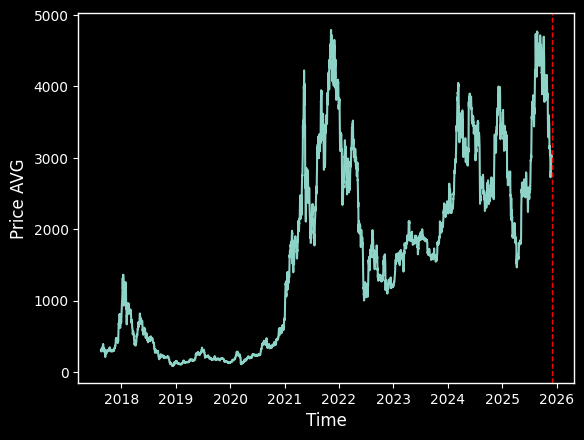

In [140]:
# print(end_date)
# print(pd.to_datetime(end_date, unit='ms'))

df["timestamp"] = pd.to_datetime(df["timestamp"])

df = pd.read_csv("ETH/ETHUSDT_12h_1000.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['open'] = pd.to_numeric(df['open'], errors='coerce')
df['close'] = pd.to_numeric(df['close'], errors='coerce')

df = df.dropna(subset=['timestamp', 'open', 'close'])

df['price_avg'] = (df['open'] + df['close']) / 2

plt.plot(df['timestamp'], df['price_avg'], marker='', linestyle='-')
close = df['close'].iloc[-1]
closet = df['timestamp'].iloc[-1]
plt.axvline(x=closet, color='red', linestyle='--', linewidth=1)
plt.xlabel("Time")
plt.ylabel("Price AVG")
plt.style.use("dark_background")
plt.grid()
plt.show()